In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline
import statistics
import numpy as np
import scipy
from math import sqrt
import sklearn

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# prediction metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score




In [2]:
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


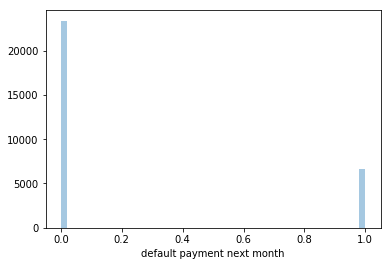

In [11]:
sns.distplot(credit['default payment next month'], kde = False);

#plt.hist(credit['LIMIT_BAL'], bins=20)
#plt.figure(figsize=(100,200))
#plt.show()

In [ ]:
plt.boxplot(credit['LIMIT_BAL'], 0,'gD')
plt.show()


In [ ]:
x = credit['PAY_0']
y = credit['LIMIT_BAL']
plt.scatter(x,y)
plt.show()

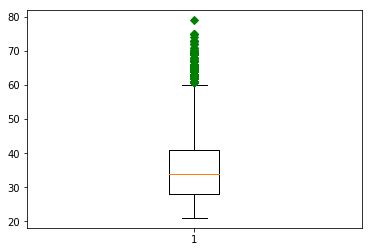

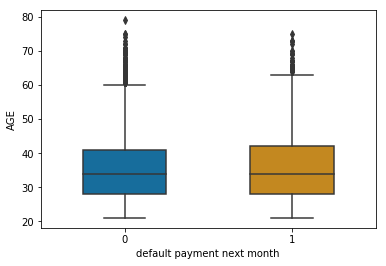

In [28]:
A = credit['AGE']
plt.boxplot(A,0,'gD')
plt.show()
# A seaborn plot with default category
bplot = sns.boxplot(x='default payment next month', y='AGE', 
                 data=credit, 
                 width=0.5,
                 palette="colorblind")

In [22]:
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [16]:
#The ID column is  just a row number column and so we will drop it.
CleanData = data = credit.drop(columns="ID")

In [26]:
# convert the 'default payment next month', and other categorical variables to categorical type
CleanData['default payment next month'] = CleanData['default payment next month'].astype('category',copy=False)
CleanData['SEX'] = CleanData['SEX'].astype('category',copy=False)
CleanData['EDUCATION'] = CleanData['EDUCATION'].astype('category',copy=False)
CleanData['MARRIAGE'] = CleanData['MARRIAGE'].astype('category',copy=False)
print (CleanData['MARRIAGE'].unique())

[1, 2, 3, 0]
Categories (4, int64): [1, 2, 3, 0]


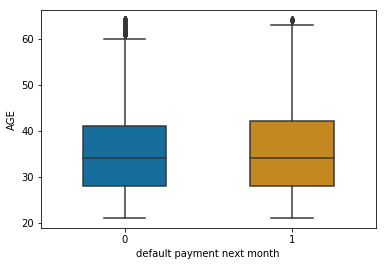

In [37]:
#based on the AGE boxplot grouped by defaulters, we see that the percentage of defaulters over the age of 65 is very low. 
#So we will filter those out
CleanData=CleanData[CleanData.AGE <65]
bplot = sns.boxplot(x='default payment next month', y='AGE', 
                 data=CleanData, 
                 width=0.5,
                 palette="colorblind")

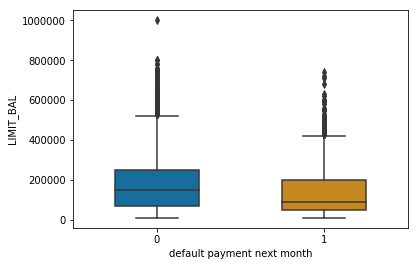

In [38]:
bplot = sns.boxplot(x='default payment next month', y='LIMIT_BAL', 
                 data=CleanData, 
                 width=0.5,
                 palette="colorblind")


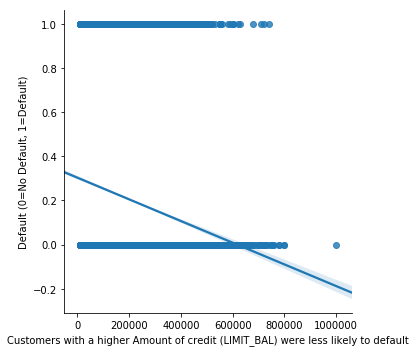

In [16]:
#Customers with a higher Amount of credit (LIMIT_BAL) were less likely to default
g =sns.lmplot('LIMIT_BAL', 'default payment next month', data=credit)
g.set_axis_labels ("Customers with a higher Amount of credit (LIMIT_BAL) were less likely to default", "Default (0=No Default, 1=Default)")

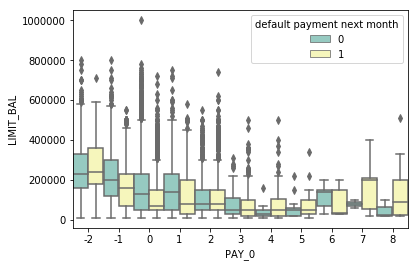

In [110]:
# Customers with a payment delay of multiple months with a high LIMIT_BAL seem to be defaulting more
bplot = sns.boxplot(x='PAY_0', y='LIMIT_BAL',hue ='default payment next month',
                 data=CleanData, 
                 width=1,
                 palette="Set3")

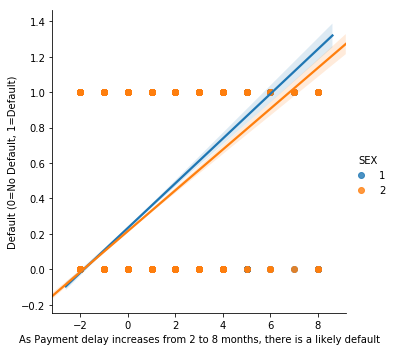

In [14]:
#As the Payment delay in months increases, there is a clear trend towards defaulting
g =sns.lmplot('PAY_0', 'default payment next month', data=credit, hue='SEX')
g.set_axis_labels("As Payment delay increases from 2 to 8 months, there is a likely default", "Default (0=No Default, 1=Default)")

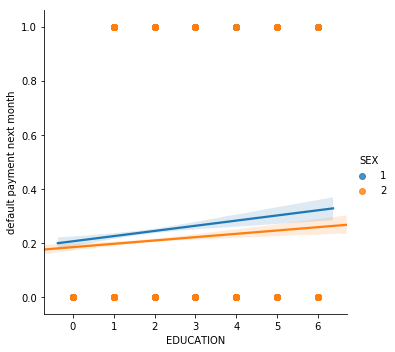

In [78]:
#Highly educated people were slightly less likely to default than lower educated people
sns.lmplot('EDUCATION', 'default payment next month', data=credit, hue='SEX')

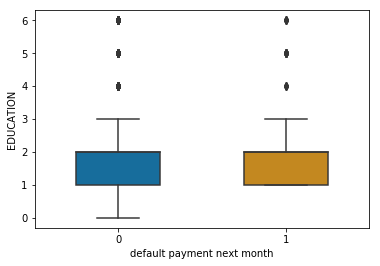

In [73]:
bplot = sns.boxplot(x='default payment next month', y='EDUCATION', 
                 data=credit, 
                 width=0.5,
                 palette="colorblind")

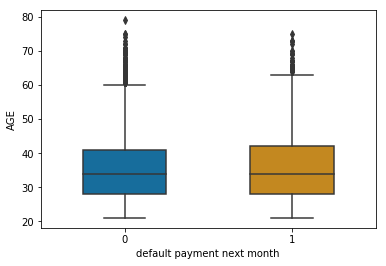

In [87]:
bplot = sns.boxplot(x='default payment next month', y='AGE',
                 data=credit, 
                    width =0.5,
                    palette='colorblind'
                 )

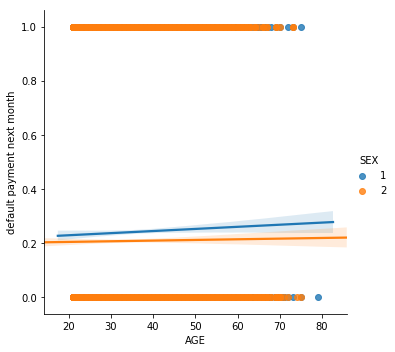

In [83]:
#defaulting trend remained the same within all ages. Most defaulters between 25 and 45 years old
sns.lmplot('AGE', 'default payment next month', data=credit, hue='SEX')

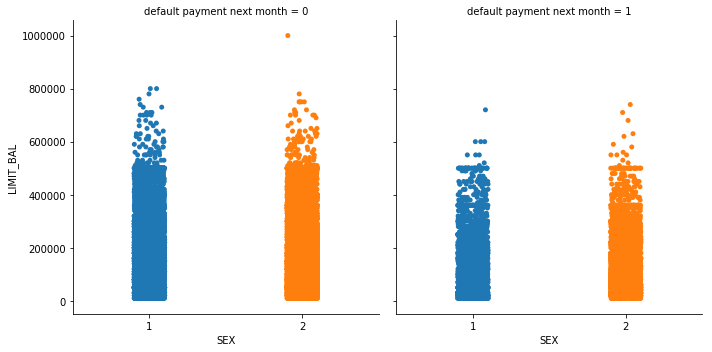

In [99]:
#Most defaulters have a LIMIT_BAL under 400000
# Drop the records with LIMIT_BAL > 500000
LIMIT_BAL_df = credit[credit['LIMIT_BAL'] < 500000]
sns.catplot(y='LIMIT_BAL', data=credit,x='SEX', col='default payment next month')
                

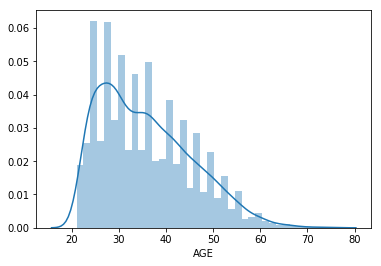

In [18]:
#Most defaulters have a LIMIT_BAL under 400000
# Drop the records with LIMIT_BAL > 500000
part_df = credit[credit['default payment next month'] == 1]

sns.distplot(part_df['AGE'])


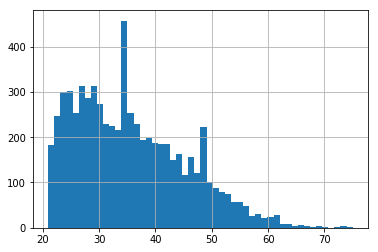

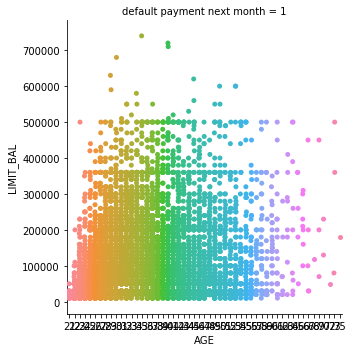

In [19]:
part_df['AGE'].hist(bins=50)
sns.catplot(y='LIMIT_BAL', data=part_df,x='AGE', col='default payment next month')

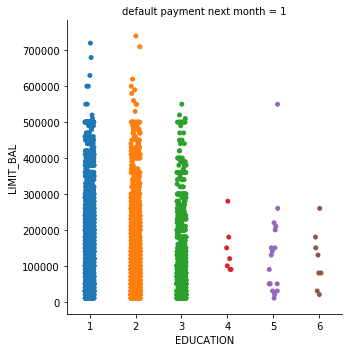

In [111]:
sns.catplot(y='LIMIT_BAL', data=part_df,x='EDUCATION', col='default payment next month')

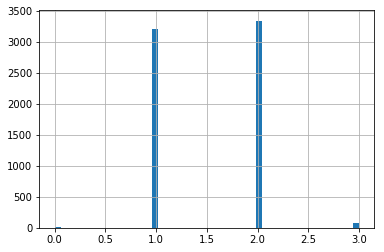

In [113]:
part_df['MARRIAGE'].hist(bins=50)

In [14]:
print (' Based on the EDA so far we will ')
print (' 1. Remove the ID column from the dataset')
print (' 2. Combine the Education levels 0,4,5,6 into one level -0')
print (' 3. Combine the Marriage levels 0,3 into one level - 3')
print (' 4. Find outliers in LIMIT_BAL column by the formula Q3 + 1.5XIQR and exlude data > than that value')

 Based on the EDA so far we will 
 1. Remove the ID column from the dataset
 2. Combine the Education levels 0,4,5,6 into one level -0
 3. Combine the Marriage levels 0,3 into one level - 3


In [3]:
CleanData = credit.drop(columns="ID")

In [4]:
CleanData['EDUCATION'] = CleanData['EDUCATION'].replace([4,5,6], 0)

In [5]:
CleanData['MARRIAGE'] = CleanData['MARRIAGE'].replace([0], 3)

In [6]:
CleanData.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.779867,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.728486,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,3.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
#get the Q1 and Q3 quantiles for LIMIT_BAL
Q1, Q3= np.percentile(CleanData['LIMIT_BAL'],[25,75])
IQR = (Q3 - Q1)
upper_bound = Q3 +(1.5 * IQR) 
lower_bound = Q1 -(1.5 * IQR)
print (upper_bound)
print (lower_bound)

525000.0
-235000.0


In [8]:
# find how many observations are above the 525000 LIMIT_BAL and omit those
limitbal_value_counts= CleanData['LIMIT_BAL'].value_counts()
print (sum(limitbal_value_counts.loc[limitbal_value_counts.index > 525000]))
CleanData = CleanData[CleanData['LIMIT_BAL'] < 525000]
CleanData.describe() 

167


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,...,29833.000000,29833.000000,29833.000000,29833.000000,2.983300e+04,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000
mean,164963.284953,1.604029,1.781417,1.557537,35.463983,-0.015017,-0.132236,-0.164717,-0.219254,-0.265109,...,42631.006805,39715.641806,38279.789696,5605.118996,5.862359e+03,5113.647035,4756.921664,4690.585694,5121.518620,0.221801
std,125529.099652,0.489066,0.728302,0.521510,9.218344,1.124272,1.198032,1.197798,1.170399,1.134290,...,62444.527519,58902.828515,57803.698109,16382.410837,2.292933e+04,16388.582348,15258.488005,14680.485954,17405.221856,0.415465
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2310.000000,1749.000000,1240.000000,1000.000000,8.200000e+02,390.000000,291.000000,244.000000,102.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19002.000000,18070.000000,16990.000000,2100.000000,2.005000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53952.000000,49939.000000,48914.000000,5001.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000,0.000000
max,520000.000000,2.000000,3.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
CleanData['default payment next month'].value_counts()

0    23216
1     6617
Name: default payment next month, dtype: int64

In [10]:
#get the Q1 and Q3 quantiles for PAY_AMTs
Q1, Q3= np.percentile(CleanData['PAY_AMT6'],[25,75])
IQR = (Q3 - Q1)
upper_bound = Q3 +(1.5 * IQR) 
lower_bound = Q1 -(1.5 * IQR)
print ('PAT_AMT6', upper_bound)
print ('PAT_AMT6', lower_bound)
print()
Q1, Q3= np.percentile(CleanData['PAY_AMT5'],[25,75])
IQR = (Q3 - Q1)
upper_bound = Q3 +(1.5 * IQR) 
lower_bound = Q1 -(1.5 * IQR)
print ('PAY_AMT5', upper_bound)
print ('PAY_AMT5', lower_bound)
print()
Q1, Q3= np.percentile(CleanData['PAY_AMT4'],[25,75])
IQR = (Q3 - Q1)
upper_bound = Q3 +(1.5 * IQR) 
lower_bound = Q1 -(1.5 * IQR)
print ('PAY_AMT4', upper_bound)
print ('PAY_AMT4', lower_bound)
print()
Q1, Q3= np.percentile(CleanData['PAY_AMT3'],[25,75])
IQR = (Q3 - Q1)
upper_bound = Q3 +(1.5 * IQR) 
lower_bound = Q1 -(1.5 * IQR)
print ('PAY_AMT3', upper_bound)
print ('PAY_AMT3', lower_bound)
print()
Q1, Q3= np.percentile(CleanData['PAY_AMT2'],[25,75])
IQR = (Q3 - Q1)
upper_bound = Q3 +(1.5 * IQR) 
lower_bound = Q1 -(1.5 * IQR)
print ('PAY_AMT2', upper_bound)
print ('PAY_AMT2', lower_bound)
print()
Q1, Q3= np.percentile(CleanData['PAY_AMT1'],[25,75])
IQR = (Q3 - Q1)
upper_bound = Q3 +(1.5 * IQR) 
lower_bound = Q1 -(1.5 * IQR)
print ('PAY_AMT1', upper_bound)
print ('PAY_AMT1', lower_bound)
print()

PAT_AMT6 9847.0
PAT_AMT6 -5745.0

PAY_AMT5 9634.0
PAY_AMT5 -5390.0

PAY_AMT4 9563.5
PAY_AMT4 -5272.5

PAY_AMT3 10665.0
PAY_AMT3 -5775.0

PAY_AMT2 11270.0
PAY_AMT2 -5450.0

PAY_AMT1 11002.5
PAY_AMT1 -5001.5



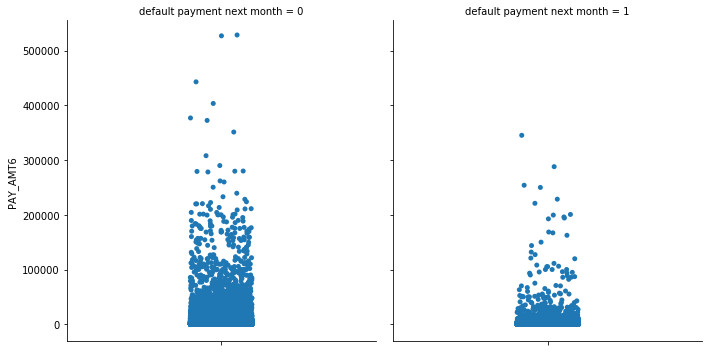

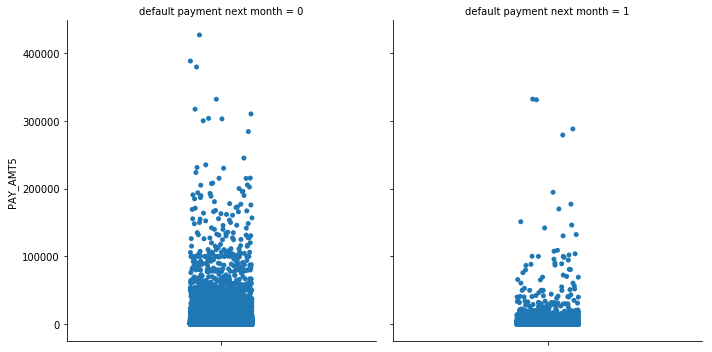

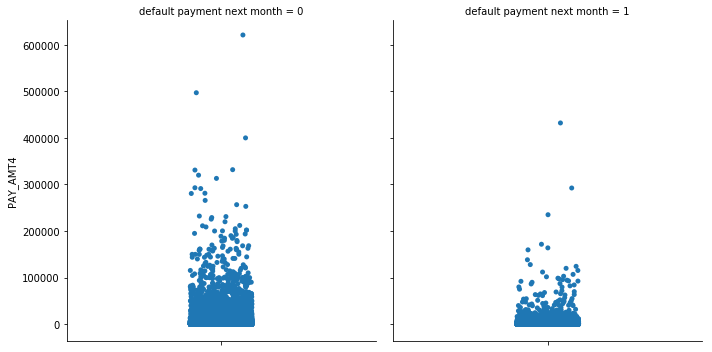

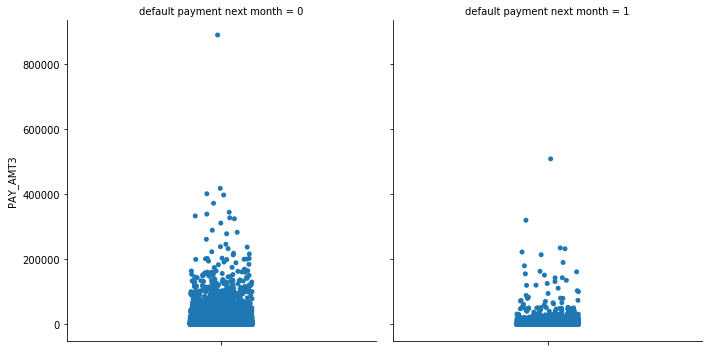

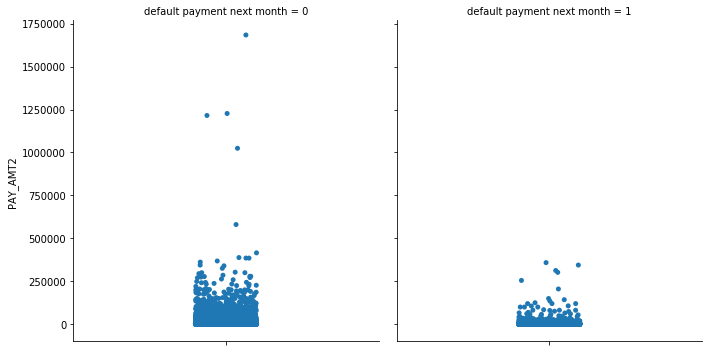

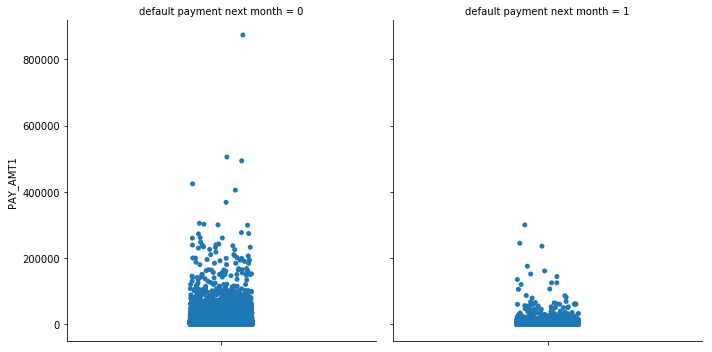

In [11]:
sns.catplot(y='PAY_AMT6', data=CleanData, col='default payment next month')
sns.catplot(y='PAY_AMT5', data=CleanData, col='default payment next month')
sns.catplot(y='PAY_AMT4', data=CleanData, col='default payment next month')
sns.catplot(y='PAY_AMT3', data=CleanData, col='default payment next month')
sns.catplot(y='PAY_AMT2', data=CleanData, col='default payment next month')
sns.catplot(y='PAY_AMT1', data=CleanData, col='default payment next month')

In [12]:
# find how many observations are above the 12000 PAY_AMTs and omit those

limitbal_value_counts= CleanData['PAY_AMT6'].value_counts()
print ('PAY_AMT6', sum(limitbal_value_counts.loc[limitbal_value_counts.index > 12000]))

limitbal_value_counts= CleanData['PAY_AMT5'].value_counts()
print ('PAY_AMT5',sum(limitbal_value_counts.loc[limitbal_value_counts.index > 12000]))

limitbal_value_counts= CleanData['PAY_AMT4'].value_counts()
print ('PAY_AMT4',sum(limitbal_value_counts.loc[limitbal_value_counts.index > 12000]))

limitbal_value_counts= CleanData['PAY_AMT3'].value_counts()
print ('PAY_AMT3',sum(limitbal_value_counts.loc[limitbal_value_counts.index > 12000]))

limitbal_value_counts= CleanData['PAY_AMT2'].value_counts()
print ('PAY_AMT2',sum(limitbal_value_counts.loc[limitbal_value_counts.index > 12000]))

limitbal_value_counts= CleanData['PAY_AMT1'].value_counts()
print ('PAY_AMT1',sum(limitbal_value_counts.loc[limitbal_value_counts.index > 12000]))

print ('Looks like about 2000 observations are outliers on the PAY_AMT columns and most of them have a defaulting status of 0 = non defaulters. We should omit these.')


PAY_AMT6 2046
PAY_AMT5 1985
PAY_AMT4 2002
PAY_AMT3 2225
PAY_AMT2 2468
PAY_AMT1 2455
Looks like about 2000 observations are outliers on the PAY_AMT columns and most of them have a defaulting status of 0 = non defaulters. We should omit these.


In [13]:
#omit the outlier columns
CleanData = CleanData[CleanData['PAY_AMT6'] < 12000]
CleanData = CleanData[CleanData['PAY_AMT5'] < 12000]
CleanData = CleanData[CleanData['PAY_AMT4'] < 12000]
CleanData = CleanData[CleanData['PAY_AMT3'] < 12000]
CleanData = CleanData[CleanData['PAY_AMT2'] < 12000]
CleanData = CleanData[CleanData['PAY_AMT1'] < 12000]
CleanData.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,...,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000,22294.000000
mean,140999.357675,1.603436,1.825110,1.557594,35.348031,0.091818,-0.031354,-0.077824,-0.151117,-0.210684,...,34733.497264,32063.631246,30763.127972,2553.017449,2433.863102,2102.858348,1893.726787,1899.543689,1844.497174,0.249439
std,111557.708179,0.489195,0.723803,0.522647,9.420995,1.136277,1.236620,1.241342,1.227350,1.195834,...,46793.542438,44317.859904,43504.049349,2518.051950,2464.615461,2321.757234,2224.659469,2241.546241,2229.008841,0.432698
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1375.750000,1000.000000,707.000000,486.250000,390.000000,216.000000,8.000000,0.000000,0.000000,0.000000
50%,110000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17837.500000,16141.500000,14365.500000,2000.000000,1800.000000,1443.000000,1044.000000,1053.000000,1000.000000,0.000000
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,48420.250000,44748.500000,42715.750000,3630.000000,3461.750000,3000.000000,2949.750000,3000.000000,2856.750000,0.000000
max,520000.000000,2.000000,3.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,400196.000000,408503.000000,346216.000000,11980.000000,11982.000000,11958.000000,11990.000000,11980.000000,11961.000000,1.000000


In [14]:
#Count the number of records remaining in the cleaned dataset based on defaullters and non defaulters
print (CleanData['default payment next month'].value_counts())
print ('Based on the distribution of the default level counts, since the number of non-defaulters is more in this dataset, \nour model can skew towards training on that and learn insufficiently.')
print('Based on the current counts the non-defaulters to defaulters distribution is 70% and 30%. We should try to make this\n distribution more even by finding what factors correlate less to the defaulters and evaluate if they can be omitted.')

0    16733
1     5561
Name: default payment next month, dtype: int64
Based on the distribution of the default level counts, since the number of non-defaulters is more in this dataset, 
our model can skew towards training on that and learn insufficiently.
Based on the current counts the non-defaulters to defaulters distribution is 70% and 30%. We should try to make this
 distribution more even by finding what factors correlate less to the defaulters and evaluate if they can be omitted.


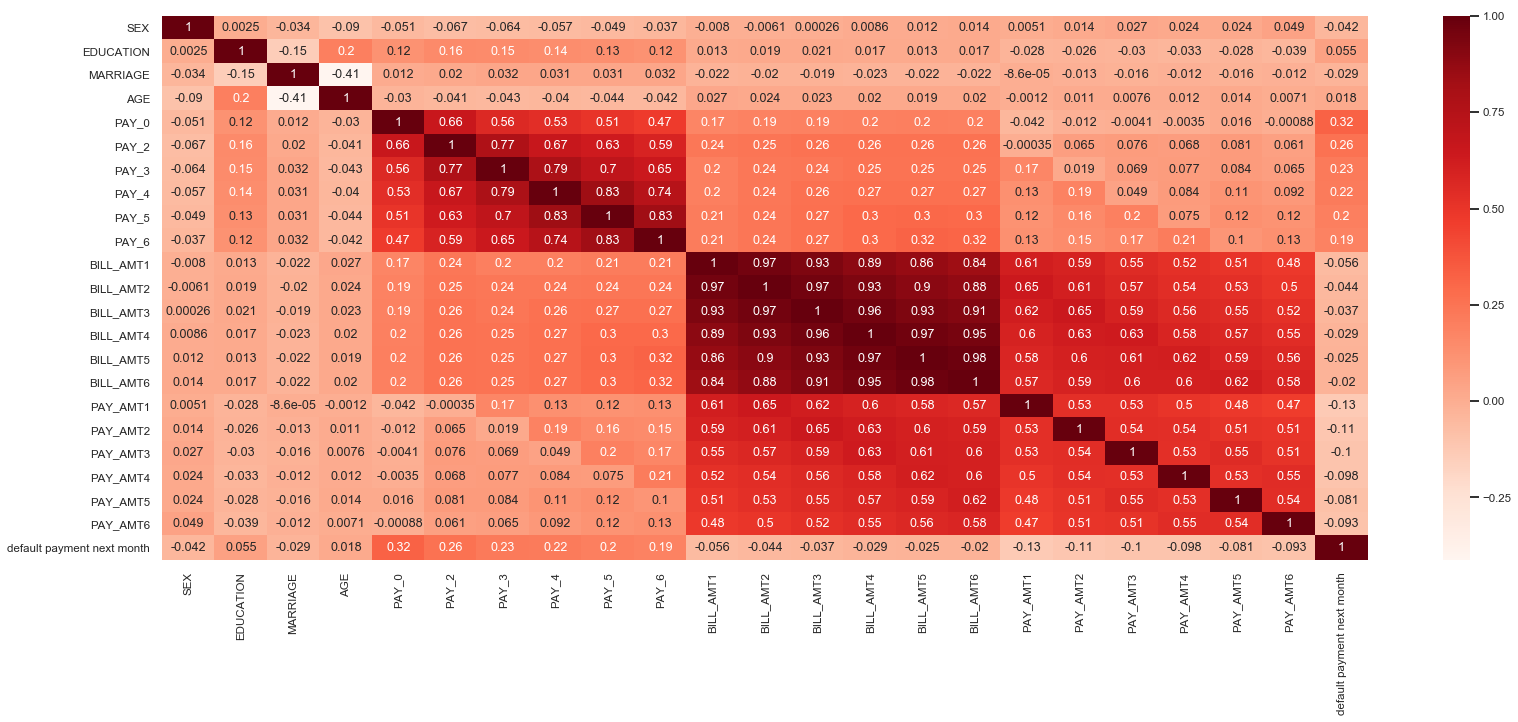

In [15]:
#Check the heat map for correlation based on cleaned data so far
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(CleanData.iloc[:,1:].corr(), cmap='Reds', annot=True);


In [16]:
#Lets look at Age to find what the distribution is 
Q1, Q3= np.percentile(CleanData['AGE'],[25,75])
IQR = (Q3 - Q1)
upper_bound = Q3 +(1.5 * IQR) 
lower_bound = Q1 -(1.5 * IQR)
print ('AGE outlier upper_bound', upper_bound)
print ('AGE outlier lower_bound', lower_bound)
print()

AGE outlier upper_bound 63.0
AGE outlier lower_bound 7.0



In [17]:
limitbal_value_counts= CleanData['AGE'].value_counts()
print ('Count of observatiobs of AGE greater than 63 = ',sum(limitbal_value_counts.loc[limitbal_value_counts.index > 63]))

Count of observatiobs of AGE greater than 63 =  105


In [18]:
#omit the outlier observations based on age > 63
CleanData = CleanData[CleanData['AGE'] < 63]
CleanData.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.00000,22164.000000,22164.000000,22164.000000,...,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000
mean,140713.755640,1.604088,1.822911,1.560007,35.166622,0.092312,-0.03059,-0.076836,-0.150379,-0.209890,...,34691.083198,32014.417614,30719.463048,2552.566324,2432.734254,2103.088477,1890.829498,1898.628361,1844.107066,0.249143
std,111405.779801,0.489057,0.722335,0.522438,9.142067,1.135997,1.23620,1.241424,1.227528,1.195949,...,46748.018027,44262.080462,43444.031852,2517.428255,2464.112626,2322.285755,2222.984676,2242.168797,2228.596689,0.432526
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.00000,-1.000000,-1.000000,-1.000000,...,1384.750000,1000.000000,710.500000,497.500000,390.000000,221.500000,8.000000,0.000000,0.000000,0.000000
50%,110000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,17837.500000,16130.000000,14364.000000,2000.000000,1800.000000,1442.500000,1041.000000,1052.000000,1000.000000,0.000000
75%,200000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,48352.000000,44660.000000,42651.500000,3628.000000,3455.000000,3000.000000,2938.500000,3000.000000,2856.250000,0.000000
max,520000.000000,2.000000,3.000000,3.000000,62.000000,8.000000,8.00000,8.000000,8.000000,8.000000,...,400196.000000,408503.000000,346216.000000,11980.000000,11982.000000,11958.000000,11990.000000,11980.000000,11961.000000,1.000000


In [19]:
#Count the number of records remaining in the cleaned dataset based on defaullters and non defaulters
print (CleanData['default payment next month'].value_counts())

0    16642
1     5522
Name: default payment next month, dtype: int64


In [20]:
#Lets run a quick model to see how we are doing based on the cleaned data so far
#Models
modelSVR = SVR(gamma=2, C=1)
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

#features
features = CleanData.iloc[:,0:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800


In [21]:
#dependent variable
depVar = CleanData['default payment next month']

X = features
y = depVar

In [22]:
#Training Set (Feature Space: X Training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [23]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train, cv=10)) 
modelLR.score(X_train,y_train)

[0.1477737  0.12965942 0.11757976 0.1173161  0.12593976 0.1250625
 0.10492023 0.12625664 0.16929485 0.11980362]


0.13188563378224494

In [24]:
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train,cv=10))
modelRF.score(X_train,y_train)

C:\Users\Chitari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.08690926 0.06307861 0.12769161 0.09372351 0.13388383 0.12607866
 0.0451033  0.1017462  0.16423709 0.11863044]


0.8426755360334484

In [148]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

C:\Users\Chitari\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[-0.01395819 -0.01245452 -0.01668569]


0.9436607564670654

In [25]:
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
#print ('Train Accuracy :: '', accuracy_score(y_train, modelRF.predict(X_train)))
#print ('Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (classification_report(y_test, predictions, target_names=['not default', 'default']))
#cm= confusion_matrix(y_test, predictions)
#print("Accuracy on Test Set for SVR = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

R Squared: 0.099
RMSE: 0.411


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [26]:
print ()
print ('The above error "Classification metrics can\'t handle a mix of binary and continuous targets')
print ('This means that we need to One Hot Encode the categorical varibles')
print()



The above error "Classification metrics can't handle a mix of binary and continuous targets
This means that we need to One Hot Encode the categorical varibles



In [27]:
#Copy the Cleaned dataset into a new dataset to dummyfy categorical variables
DummyfiedDF = CleanData.copy()

# now drop the original 'EDUCATION' column (you don't need it anymore)
DummyfiedDF = pd.concat([DummyfiedDF,pd.get_dummies(DummyfiedDF['EDUCATION'], prefix='EDUCATION')],axis=1)
DummyfiedDF.drop(['EDUCATION'],axis=1, inplace=True)

# now drop the original 'MARRIAGE' column (you don't need it anymore)
DummyfiedDF = pd.concat([DummyfiedDF,pd.get_dummies(DummyfiedDF['MARRIAGE'], prefix='MARRIAGE')],axis=1)
DummyfiedDF.drop(['MARRIAGE'],axis=1, inplace=True)

# now drop the original 'SEX' column (you don't need it anymore)
DummyfiedDF = pd.concat([DummyfiedDF,pd.get_dummies(DummyfiedDF['SEX'], prefix='SEX')],axis=1)
DummyfiedDF.drop(['SEX'],axis=1, inplace=True)

In [28]:
DummyfiedDF.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default payment next month,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,0,0,1,0,1,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1,0,0,1,0,0,1,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,0,1,0,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,0,1,0,1,0,0,0,1
5,50000,37,0,0,0,0,0,0,64400,57069,...,0,0,1,0,0,0,1,0,1,0


In [30]:
#Lets try the models again
#features
#Move the dependant variable to the end of the DF first so we can exclude it from the "X" features
DummyfiedDF = DummyfiedDF[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','EDUCATION_0','EDUCATION_1','EDUCATION_2','EDUCATION_3','MARRIAGE_1','MARRIAGE_2','MARRIAGE_3','SEX_1','SEX_2','default payment next month']]
features = DummyfiedDF.iloc[:,0:29]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,1,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,2000,0,0,1,0,0,1,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,5000,0,0,1,0,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,1000,0,0,1,0,1,0,0,0,1
5,50000,37,0,0,0,0,0,0,64400,57069,...,800,0,1,0,0,0,1,0,1,0


In [31]:
#dependent variable
depVar = DummyfiedDF['default payment next month']

X = features
y = depVar

print (DummyfiedDF['default payment next month'].value_counts())

0    16642
1     5522
Name: default payment next month, dtype: int64


In [32]:
#Training Set (Feature Space: X Training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40)
print ('Training set counts for default \n', y_train.value_counts())
print ('Test set counts for default \n', y_test.value_counts())
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train, cv =10))
modelRF.score(X_train,y_train)


Training set counts for default 
 0    10799
1     3607
Name: default payment next month, dtype: int64
Test set counts for default 
 0    5843
1    1915
Name: default payment next month, dtype: int64
[0.04048543 0.14351624 0.11751973 0.1076191  0.1933386  0.12191763
 0.04940216 0.07311808 0.14138849 0.12234974]


0.8408461201240717

In [20]:
predictions = modelRF.predict(X_test)
recall_score(y_test, predictions)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
#print ('Train Accuracy :: ', accuracy_score(y_train, modelRF.predict(X_train)))
#print ('Test Accuracy  :: ', accuracy_score(y_test, predictions))
print (classification_report(y_test, predictions, target_names=['not default', 'default']))
cm= confusion_matrix(y_test, predictions)


NameError: name 'modelRF' is not defined

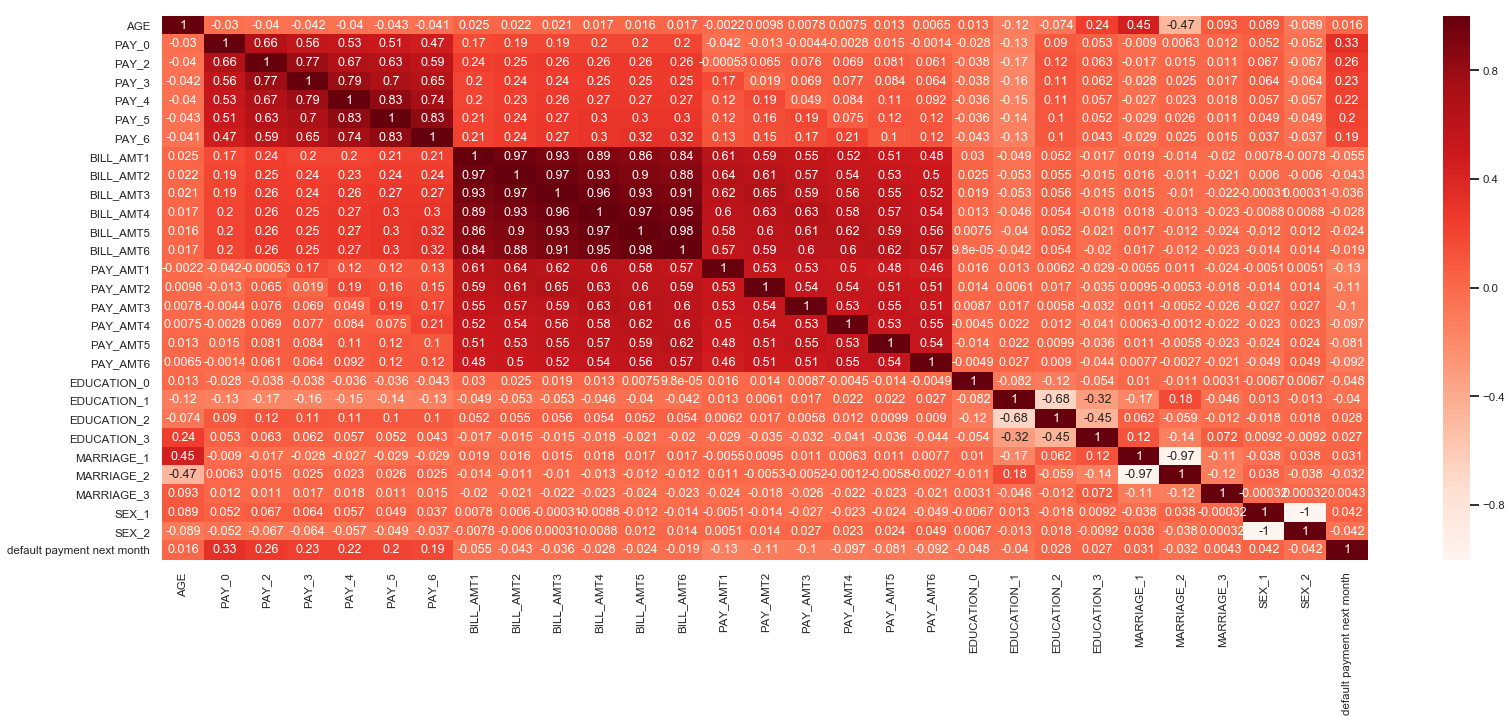

In [36]:
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(DummyfiedDF.iloc[:,1:].corr(), cmap='Reds', annot=True);